In [270]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import FancyArrowPatch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [271]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [255]:
#Printing null values in the dataframe
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [256]:
#Printing the datatypes of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [257]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling (excluding the 'Outcome' column)
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Display the scaled data
print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


/tmp/ipykernel_62134/2516899916.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.63994726 -0.84488505  1.23388019 -0.84488505 -1.14185152  0.3429808
 -0.25095213  1.82781311 -0.54791859  1.23388019  0.04601433  1.82781311
  1.82781311 -0.84488505  0.3429808   0.93691372 -1.14185152  0.93691372
 -0.84488505 -0.84488505 -0.25095213  1.23388019  0.93691372  1.53084665
  2.12477957  1.82781311  0.93691372 -0.84488505  2.7187125   0.3429808
  0.3429808  -0.25095213 -0.25095213  0.63994726  1.82781311  0.04601433
  2.12477957  1.53084665 -0.54791859  0.04601433 -0.25095213  0.93691372
  0.93691372  1.53084665  0.93691372 -1.14185152 -0.84488505 -0.54791859
  0.93691372  0.93691372 -0.84488505 -0.84488505  0.3429808   1.23388019
  0.93691372 -0.84488505  0.93691372 -1.14185152 -1.14185152 -1.14185152
 -0.54791859  1.23388019  0.3429808  -0.54791859  0.93691372  0.3429808
 -1.14185152 -0.54791859 -0.84488505  0.0460

In [258]:
# Converting the scaled numpy array' back to pandas dataframe 
dff = pd.DataFrame(df_scaled)
dff

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [259]:
# Features and target
X = dff.drop('Outcome', axis=1)
y = dff['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
# Initialize ElasticNet model
ElasticNet = ElasticNet(alpha=0.2, random_state=42)

# Fit the model
ElasticNet.fit(X_train, y_train)

ElasticNet(alpha=0.2, random_state=42)

In [261]:
# Make predictions
y_pred = ElasticNet.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print("Lasso Coefficients:", ElasticNet.coef_)

Mean Squared Error: 0.1870576815104339
Lasso Coefficients: [0.         0.10177346 0.         0.         0.         0.02123483
 0.         0.00337151]


In [262]:
# List of columns to drop
columns_to_drop = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']

# Drop the specified columns from X_train and X_test
X_train_reduced = X_train.drop(columns=columns_to_drop, axis=1)
X_test_reduced = X_test.drop(columns=columns_to_drop, axis=1)

# Display the shapes of the reduced DataFrames
print(f"Reduced X_train shape: {X_train_reduced.shape}")
print(f"Reduced X_test shape: {X_test_reduced.shape}")
X_train_reduced

Reduced X_train shape: (614, 3)
Reduced X_test shape: (154, 3)


,Glucose,BMI,Age
60,-1.154694,-4.060474,-1.041549
618,-0.278373,-0.481351,1.425995
346,0.566649,-0.417892,-0.956462
294,1.255187,-1.280942,2.702312
231,0.410164,1.803195,1.085644
...,...,...,...
71,0.566649,-0.430583,-0.616111
106,-0.779128,-1.217483,-0.531023
270,-0.622642,1.727044,0.404942
435,0.629244,1.320902,-0.360847


In [263]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_reduced, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7768892443022791


In [264]:
# Initialize SVM with the best parameters
best_svm = SVC(C=1, gamma='scale', kernel='rbf', random_state=42)

# Fit the model with the training data
best_svm.fit(X_train_reduced, y_train)

SVC(C=1, random_state=42)

In [265]:
# Make predictions on the test set
y_pred = best_svm.predict(X_test_reduced)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[81 18]
 [20 35]]


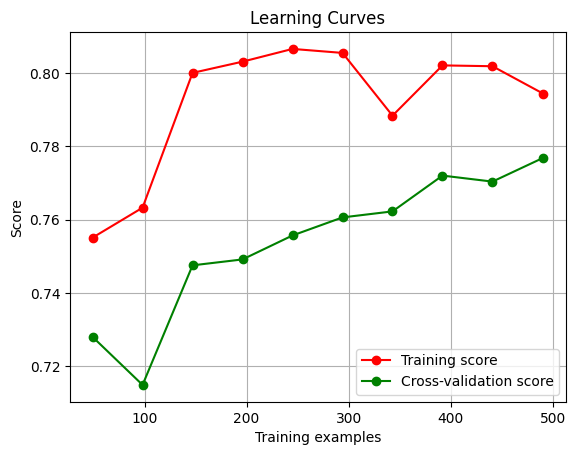

In [269]:
# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_reduced, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()